In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv("abalone.csv")

In [27]:
data.head(50)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [28]:
data["Sex"] = data["Sex"].map(lambda x: 1 if x == "M" else (1 if x == "F" else 0))

In [29]:
y = data["Rings"]
X = data.drop("Rings", axis=1)

In [30]:
X.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [32]:
results = []
for n_estimators in range(1, 51):
    r2_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=1)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
    
    mean_r2 = np.mean(r2_scores)
    results.append((n_estimators, mean_r2))


In [33]:
for n_estimators, mean_r2 in results:
    print(f"Число деревьев: {n_estimators}, Средний R^2 на кросс-валидации: {mean_r2}")

Число деревьев: 1, Средний R^2 на кросс-валидации: 0.12219956957074221
Число деревьев: 2, Средний R^2 на кросс-валидации: 0.3409131307156053
Число деревьев: 3, Средний R^2 на кросс-валидации: 0.41024520222121713
Число деревьев: 4, Средний R^2 на кросс-валидации: 0.4445333359768567
Число деревьев: 5, Средний R^2 на кросс-валидации: 0.45700438990675296
Число деревьев: 6, Средний R^2 на кросс-валидации: 0.46840774385709666
Число деревьев: 7, Средний R^2 на кросс-валидации: 0.47592946167161687
Число деревьев: 8, Средний R^2 на кросс-валидации: 0.4819849053205065
Число деревьев: 9, Средний R^2 на кросс-валидации: 0.48583317286185385
Число деревьев: 10, Средний R^2 на кросс-валидации: 0.4898292768960948
Число деревьев: 11, Средний R^2 на кросс-валидации: 0.4910940986106211
Число деревьев: 12, Средний R^2 на кросс-валидации: 0.4943510855964365
Число деревьев: 13, Средний R^2 на кросс-валидации: 0.49915655185234586
Число деревьев: 14, Средний R^2 на кросс-валидации: 0.5037068483642291
Число де

In [35]:
import matplotlib.pyplot as plt

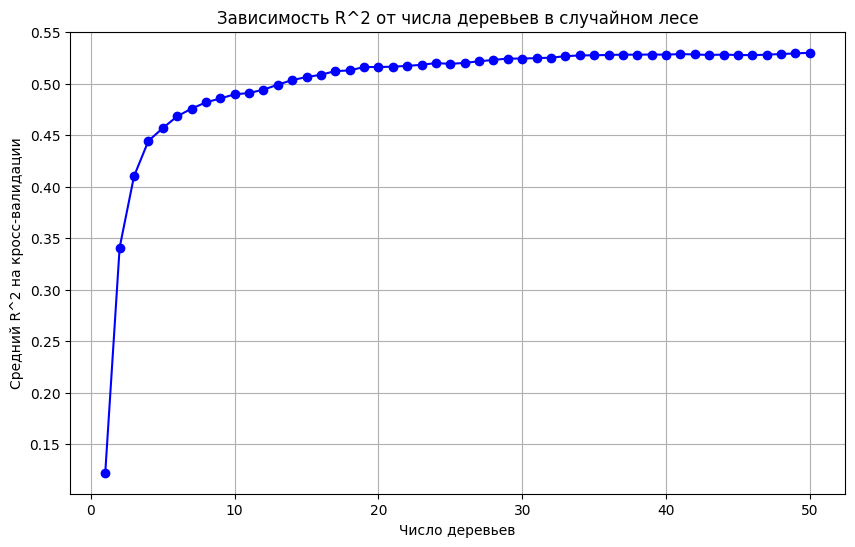

In [36]:
num_estimators, mean_r2 = zip(*results)

# Постройте график
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, mean_r2, marker='o', linestyle='-', color='b')
plt.title('Зависимость R^2 от числа деревьев в случайном лесе')
plt.xlabel('Число деревьев')
plt.ylabel('Средний R^2 на кросс-валидации')
plt.grid(True)
plt.show()